**DATA ACQUISITION STEP**

In [299]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [300]:
#connect to kaggle for dataset downlord
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/NLP/kaggle.json ~/.kaggle/

In [301]:
#downlord dataset
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [302]:
#unzip dataset
!unzip imdb-dataset-of-50k-movie-reviews.zip


Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IMDB Dataset.csv        


In [303]:
#taking sample of top just 1000 rows
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv').head(1000)

In [304]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [305]:
#assign Variables to reviews and labels
reviews = df['review']
sentiments = df['sentiment']
reviews

0      One of the other reviewers has mentioned that ...
1      A wonderful little production. <br /><br />The...
2      I thought this was a wonderful way to spend ti...
3      Basically there's a family where a little boy ...
4      Petter Mattei's "Love in the Time of Money" is...
                             ...                        
995    Nothing is sacred. Just ask Ernie Fosselius. T...
996    I hated it. I hate self-aware pretentious inan...
997    I usually try to be professional and construct...
998    If you like me is going to see this in a film ...
999    This is like a zoology textbook, given that it...
Name: review, Length: 1000, dtype: object

In [306]:
df.shape

(1000, 2)

In [307]:
#chk missing values
df.isnull().values.any()

False

<Axes: xlabel='sentiment', ylabel='count'>

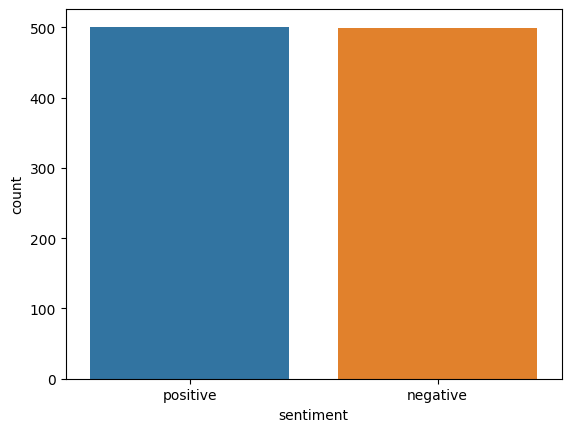

In [308]:
#check if data is balanced?
import seaborn as sn
sn.countplot(x = 'sentiment',data= df)

**DATA PREPROCESSING STEP**

**CONVERT ALL TEXT INTO LOWERCASE**

In [309]:
reviews = [each.lower() for each in reviews]
reviews[0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

**Remove HTML TAGS**

In [310]:
import re

def removeHtmlTags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

In [311]:
#removing tags from all review in reviews by calling removeHtmlTags() for each review
reviews = [removeHtmlTags(review) for review in reviews]
reviews[0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

**URL REMOVALS (if present)**

In [312]:
def removeUrls(text):
  pattern = re.compile(r'http\S+|www\S+')
  return pattern.sub(r'',text)

url1 = "https://www.example.com"
url2 = "http://example.com"
url3 = "www.example.com"
text = f"This is a sample text with embedded URLs: {url1}, {url2}, {url3}. Please visit the websites."

print(text)

removeUrls(text)

This is a sample text with embedded URLs: https://www.example.com, http://example.com, www.example.com. Please visit the websites.


'This is a sample text with embedded URLs:    Please visit the websites.'

**REMOVE PUNCTUATIONS**

In [313]:
import string

#SLOW
def removePunc(text):
  text = ''.join ([ch for ch in text if ch not in string.punctuation])
  return text

#FAST
def removePuncFast(text):
  text = text.translate(str.maketrans('','',string.punctuation))
  return text

text = "This is a sample string containing punctuation marks: !@#$%^&*()_+{}[];':,.<>?/"
print(removePuncFast(text))
removePunc(text)

This is a sample string containing punctuation marks 


'This is a sample string containing punctuation marks '

In [314]:
#apply on our dataset
reviews = [removePunc(review) for review in reviews]
reviews[4]

#one issue figured, is matti's became mattis with this

'petter matteis love in the time of money is a visually stunning film to watch mr mattei offers us a vivid portrait about human relations this is a movie that seems to be telling us what money power and success do to people in the different situations we encounter this being a variation on the arthur schnitzlers play about the same theme the director transfers the action to the present time new york where all these different characters meet and connect each one is connected in one way or another to the next person but no one seems to know the previous point of contact stylishly the film has a sophisticated luxurious look we are taken to see how these people live and the world they live in their own habitatthe only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits a big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounterthe acting i

**Short Form Work Treatment**

In [315]:
acronyms = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter"
}

def slangTranslate(text):
  newText = []
  newText = [acronyms[w.upper()] if w.upper() in acronyms else w for w in text.split()]
  return ' '.join(newText)

slangTranslate('Hellow TTFN kesy ho TTYL')

'Hellow Ta-Ta For Now! kesy ho Talk To You Later'

In [316]:
reviews = [slangTranslate(review) for review in reviews ]
reviews[:4]

['one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictu

**SPELLING CORRECTIONS**

In [317]:
#TextBlob is good for just correcting simple spellings
import textblob
from textblob import TextBlob

def correctSpellings(text):
  return TextBlob(text).correct().string


correctSpellings('i eam finne brother whate abuot yuo')
# reviews = [correctSpellings(r) for r in reviews]

'i am fine brother what about you'

**STOPWORD REMOVAL**

In [318]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [319]:
def removestopwords(text):
  toRemove = set(stopwords.words('english'))
  filtered = [w if w not in toRemove else '' for w in text.split() ]
  return ' '.join(filtered)

removestopwords('i am a professional deep learning and machine learning engineers .')

'   professional deep learning  machine learning engineers .'

In [320]:
reviews = [removestopwords(review) for review in reviews]
reviews[:2]

['one    reviewers  mentioned   watching  1 oz episode youll  hooked   right    exactly  happened  methe first thing  struck   oz   brutality  unflinching scenes  violence  set  right   word go trust      show   faint hearted  timid  show pulls  punches  regards  drugs sex  violence   hardcore   classic use   wordit  called oz     nickname given   oswald maximum security state penitentary  focuses mainly  emerald city  experimental section   prison    cells  glass fronts  face inwards  privacy   high   agenda em city  home  manyaryans muslims gangstas latinos christians italians irish  moreso scuffles death stares dodgy dealings  shady agreements  never far awayi would say  main appeal   show  due   fact   goes   shows wouldnt dare forget pretty pictures painted  mainstream audiences forget charm forget romanceoz doesnt mess around  first episode  ever saw struck    nasty   surreal  couldnt say   ready      watched   developed  taste  oz  got accustomed   high levels  graphic violence 

**REMOVE EMOJI**

In [321]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    cleaned = emoji_pattern.sub(r'',text)
    return cleaned

# Example usage
text = "Hello! 😃 How are you? 🌞"
cleaned_text = remove_emojis(text)
print(cleaned_text)

Hello!  How are you? 


**REPLACE EMOJI**

In [322]:
!pip install emoji
import emoji
def replaceEmoji (text):
  return emoji.demojize(text)
replaceEmoji('Hello! 😃 How are you? 🌞')

'Hello! :grinning_face_with_big_eyes: How are you? :sun_with_face:'

**TOKENIZATION**

**WORD TOKENIZATION**

In [323]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [324]:
def word_tokenization(text):
  return word_tokenize(text)

word_tokenization('hello i am going to australia!')

['hello', 'i', 'am', 'going', 'to', 'australia', '!']

In [325]:
#apply to DS
reviews = [word_tokenization(review) for review in reviews ]
reviews[:2]

[['one',
  'reviewers',
  'mentioned',
  'watching',
  '1',
  'oz',
  'episode',
  'youll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'methe',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'wordit',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'manyaryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'moreso',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  '

**SENTANCE TOKENIZE**

In [326]:
from nltk.tokenize import sent_tokenize

def sent_tokenization(text):
  res= sent_tokenize(text)
  return res

sentences = [
  "The quick brown fox jumps over the lazy dog.",
  "I am running in the park.",
  "She has a collection of books on various topics.",
  "They are playing football in the field.",
  "The sun sets in the west."
]
[sent_tokenization(r) for r in sentences]

[['The quick brown fox jumps over the lazy dog.'],
 ['I am running in the park.'],
 ['She has a collection of books on various topics.'],
 ['They are playing football in the field.'],
 ['The sun sets in the west.']]

**TOKENIZATION WITH SPACY (BETTER IN SOME CASES)**

In [327]:
import spacy

nlp = spacy.load('en_core_web_sm')
sentence1 = "Hello, how are you?"
sentence2 = "I love to code in Python."
sentence3 = "The quick brown fox jumps over the lazy dog."
sentence4 = "I enjoy reading books and listening to music."
sentence5 = "Can you please pass me the salt and pepper?"


doc1 = nlp(sentence1)
doc2 = nlp(sentence2)
doc3 = nlp(sentence3)

for token in doc3:
  print(token)

The
quick
brown
fox
jumps
over
the
lazy
dog
.


**STEMMING**

Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas".

EXAMPLE:
playing --> play
played --> play
plays --> play
player --> player
happiness --> happi
happier --> happier
happiest --> happiest


**Stemming vs Lemmitization**


**Stemming** is fast,sometimes generates words that maynot be part of language(SO use it when you are not showing output to user)


**Lemmitization** is slower then stemming but accurate words generation.

In [328]:
from nltk.stem import PorterStemmer

pStemmer = PorterStemmer()

def stemming(text):
  # words = text.split()
  stemmed_words = [pStemmer.stem(word) for word in text]
  return stemmed_words

stemming(['walk', 'walking', 'walked'])

['walk', 'walk', 'walk']

In [329]:
#applying to reviews
reviews = [stemming(review) for review in reviews]
reviews
reviews = [' '.join(review) for review in reviews]

**Lemminization**

POS must be specifies when calling Lemmitizer.lemitize(text, pos ='v/n/a/o')

In [330]:

import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')  # Download required resource for lemmatization


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [331]:
#not applied to reviews
lemi = WordNetLemmatizer()
sentences  = [
  "The quick brown fox jumps over the lazy dog.",
  "I am running in the park.",
  "She has a collection of books on various topics.",
  "They are playing football in the field.",
  "The sun sets in the west."
]


def lemitization(text):
  lemitized = [lemi.lemmatize(w,pos='v') for w in text]
  return ' '.join(lemitized)
sentences = [word_tokenization(s) for s in sentences]
[lemitization(sentence) for sentence in sentences]

['The quick brown fox jump over the lazy dog .',
 'I be run in the park .',
 'She have a collection of book on various topics .',
 'They be play football in the field .',
 'The sun set in the west .']

In [332]:
#not applied to reviews
lemi = WordNetLemmatizer()
sentences  = [
  "The quick brown fox jumps over the lazy dog.",
  "I am running in the park.",
  "She has a collection of books on various topics.",
  "They are playing football in the field.",
  "The sun sets in the west."
]


def lemitization(text):
  lemitized = [lemi.lemmatize(w,pos='v') for w in text]
  return ' '.join(lemitized)
sentences = [word_tokenization(s) for s in sentences]
[lemitization(sentence) for sentence in sentences]

['The quick brown fox jump over the lazy dog .',
 'I be run in the park .',
 'She have a collection of book on various topics .',
 'They be play football in the field .',
 'The sun set in the west .']

In [333]:
reviews[:2]

['one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom 

**Train Test Split**

In [334]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(reviews,sentiments,test_size= 0.2,random_state = 42)
len(y_train)
len(X_train)


800

**FEATURE ENGINEERING/ Text Representation STEP (OHE,BOW ,TFIDF)**

                                    **ONE HOT ENCODING WITH GUASSIAN NAIVE BAYES**

In [335]:
# Apply One Hot Encoding
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer_for_ohe = CountVectorizer()

k = ['This is the first sentence',
     'This is the second sentence!',
     'And this is the third sentence?',
     'This is the fourth sentence']

# Fit and transform the documents
train_one_hot_encoded = vectorizer_for_ohe.fit_transform(X_train).toarray()
test_one_hot_encoded = vectorizer_for_ohe.transform(X_test).toarray()



In [336]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(train_one_hot_encoded,y_train)
y_pred = gnb.predict(test_one_hot_encoded)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.59


In [337]:
def gnb_ohe_analysis():
  i = input('Enter Your Review For prediction: ')
  texts = [i]  # Wrap the input string in a list
  num = vectorizer_for_ohe.transform(texts)
  num = num.toarray()  # Convert sparse matrix to dense array
  prediction_gnb = gnb.predict(num)
  print('Review is:', prediction_gnb[0])

gnb_ohe_analysis()

Enter Your Review For prediction: stunning movie , will watch again soon!
Review is: negative


                                            **TF-IDF WITH GUASSIAN NAIVE BAYES**

In [338]:
# Apply tf-idf and find out the idf scores of words, also find out the vocabulary.
from sklearn.feature_extraction.text import TfidfVectorizer


# Initialize TfidfVectorizer
vectorizer_for_tfidf = TfidfVectorizer()

# Fit and transform the documents
train_tfidf_matrix = vectorizer_for_tfidf.fit_transform(X_train).toarray()
test_tfidf_matrix = vectorizer_for_tfidf.transform(X_test).toarray()


In [339]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(train_tfidf_matrix,y_train)

y_pred = gnb.predict(test_tfidf_matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.59


In [340]:
def gnb_tfidf_analysis():
  i = input('Enter Your Review For prediction: ')
  texts = [i]  # Wrap the input string in a list
  num = vectorizer_for_tfidf.transform(texts)
  num = num.toarray()  # Convert sparse matrix to dense array
  prediction_gnb = gnb.predict(num)
  print('Review is:', prediction_gnb[0])

gnb_tfidf_analysis()

Enter Your Review For prediction: stunning movie , will watch again soon!
Review is: negative


**MODELLING STEP**

                                            **BOW with GUASSIAN NAIVE BAYES**

In [341]:
#apply BOW(bag of word)
from sklearn.feature_extraction.text import CountVectorizer


cv_for_bow = CountVectorizer()
train_bow = cv_for_bow.fit_transform(X_train).toarray()
test_bow = cv_for_bow.transform(X_test).toarray()
vocab_size = len(cv_for_bow.vocabulary_)  # Get the vocabulary size
print('Vocab size : ',vocab_size)
print('train shape: ',test_bow.shape)
print('train shape: ',train_bow.shape)

Vocab size :  13876
train shape:  (200, 13876)
train shape:  (800, 13876)


In [342]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(train_bow,y_train)

y_pred = gnb.predict(test_bow)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.59


In [343]:
def gnb_bow_analysis():
  i = input('Enter Your Review For prediction: ')
  texts = [i]  # Wrap the input string in a list
  num = cv_for_bow.transform(texts)
  num = num.toarray()  # Convert sparse matrix to dense array
  prediction_gnb = gnb.predict(num)
  print('Review is:', prediction_gnb[0])

gnb_bow_analysis()

Enter Your Review For prediction: stunning movie , will watch again soon!
Review is: negative


**BOW with LOGISTIC REGRESSION**

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Initialize and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(train_bow,y_train)
y_pred = lr_model.predict(test_bow)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.83


In [345]:
def lr_bow_analysis():
  i = input('Enter Your Review For prediction: ')
  texts = [i]  # Wrap the input string in a list
  num = cv_for_bow.transform(texts)
  num = num.toarray()  # Convert sparse matrix to dense array
  prediction_gnb = lr_model.predict(num)
  print('Review is:', prediction_gnb[0])

lr_bow_analysis()

Enter Your Review For prediction: stunning movie , will watch again soon!
Review is: positive


****BOW with RANDOMFOREST CLASSIFIER****

In [346]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(train_bow, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(test_bow)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.81


In [347]:
def rf_bow_analysis():
  i = input('Enter Your Review For prediction: ')
  texts = [i]  # Wrap the input string in a list
  num = cv_for_bow.transform(texts)
  num = num.toarray()  # Convert sparse matrix to dense array
  prediction_gnb = rf_classifier.predict(num)
  print('Review is:', prediction_gnb[0])

rf_bow_analysis()

Enter Your Review For prediction: stunning movie , will watch again soon!
Review is: positive


                                       **SELF TRAINED WORD2VEC MODEL**

In [348]:
import gensim
import numpy as np
import pandas as pd
!ls

 drive		     imdb-dataset-of-50k-movie-reviews.zip
'IMDB Dataset.csv'   sample_data


In [349]:
reviews_for_word2vec = [r.split() for r in reviews]
reviews_for_word2vec [:3]

[['one',
  'review',
  'mention',
  'watch',
  '1',
  'oz',
  'episod',
  'youll',
  'hook',
  'right',
  'exactli',
  'happen',
  'meth',
  'first',
  'thing',
  'struck',
  'oz',
  'brutal',
  'unflinch',
  'scene',
  'violenc',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'heart',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violenc',
  'hardcor',
  'classic',
  'use',
  'wordit',
  'call',
  'oz',
  'nicknam',
  'given',
  'oswald',
  'maximum',
  'secur',
  'state',
  'penitentari',
  'focus',
  'mainli',
  'emerald',
  'citi',
  'experiment',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inward',
  'privaci',
  'high',
  'agenda',
  'em',
  'citi',
  'home',
  'manyaryan',
  'muslim',
  'gangsta',
  'latino',
  'christian',
  'italian',
  'irish',
  'moreso',
  'scuffl',
  'death',
  'stare',
  'dodgi',
  'deal',
  'shadi',
  'agreement',
  'never',
  'far',
  'awayi',
  'would',
  'say',
  'main',


In [350]:
model = gensim.models.Word2Vec(reviews_for_word2vec, vector_size=100, window=5, min_count=1)


In [351]:
model.build_vocab(reviews_for_word2vec)

In [352]:
model.train(reviews_for_word2vec, total_examples = model.corpus_count, epochs= model.epochs)
# model.save("/content/drive/MyDrive/NLP/word2vec_model.bin")

(571457, 600915)

In [353]:
model.wv.most_similar('best')

[('truli', 0.999832272529602),
 ('experi', 0.9998305439949036),
 ('great', 0.9998133778572083),
 ('lot', 0.9998133778572083),
 ('favorit', 0.9998084902763367),
 ('film', 0.9998036623001099),
 ('wonder', 0.9998031854629517),
 ('manyaryan', 0.9998020529747009),
 ('tast', 0.9997975826263428),
 ('may', 0.9997966289520264)]

In [354]:
model.wv.doesnt_match(['like', 'actor', 'director', 'action', 'amazing', 'loyal'])

'loyal'

In [355]:
model.wv['like']

array([-5.00233948e-01,  9.36407626e-01,  4.06480521e-01,  3.30117196e-01,
        2.56482027e-02, -1.48868513e+00,  2.95181930e-01,  2.15884280e+00,
       -5.58831394e-01, -5.29595315e-01, -3.43218237e-01, -1.56632590e+00,
       -2.01622143e-01,  3.19959491e-01,  6.92057237e-02, -8.92827630e-01,
        2.78903812e-01, -1.13634288e+00,  1.01899832e-01, -1.61508131e+00,
        5.66773951e-01,  4.94744956e-01,  5.51834404e-01, -4.81220782e-01,
       -2.65235931e-01,  1.31470279e-03, -8.23000252e-01, -5.45289934e-01,
       -5.39062560e-01, -2.00794905e-01,  1.25978255e+00,  8.18976685e-02,
        7.38722801e-01, -7.21183360e-01, -4.01138842e-01,  1.02351046e+00,
        2.22528353e-01, -6.14336550e-01, -4.67390060e-01, -1.65859008e+00,
        3.77663039e-02, -1.09923911e+00, -7.20388889e-01, -4.25445169e-01,
        6.02763772e-01, -4.99051243e-01, -6.26347005e-01, -6.35460466e-02,
        7.25325882e-01,  7.69714475e-01,  4.67939138e-01, -8.17409933e-01,
       -3.44656259e-01, -

In [356]:
model.wv.similarity('like','yellow')

0.9985351

In [357]:
model.wv.get_normed_vectors().shape #7332 vectors of 100 dimentions

(15825, 100)

In [358]:
#each word of vocab is represented by 100 dimentional vector
print('key::', model.wv.index_to_key[0])
print('vector represtation ',model.wv.get_normed_vectors()[0])

key:: movi
vector represtation  [-0.06719168  0.12250402  0.04883105  0.04807571 -0.00247508 -0.2036603
  0.04470978  0.29886976 -0.07365907 -0.0831087  -0.04024331 -0.2041429
 -0.03030943  0.03831544  0.00848184 -0.11435983  0.04361397 -0.15487023
  0.01334082 -0.23089865  0.07978486  0.0668848   0.08074912 -0.06952487
 -0.03682592 -0.00131985 -0.11790665 -0.07240746 -0.07173943 -0.02619484
  0.16878293  0.01117284  0.09935682 -0.10162739 -0.05713331  0.14035347
  0.03185236 -0.08533921 -0.06492896 -0.22502658  0.00584579 -0.15343826
 -0.09966493 -0.05681467  0.07914649 -0.06443625 -0.08362181 -0.00960104
  0.09971375  0.10699494  0.06417362 -0.11732246 -0.03872285 -0.02161669
 -0.07494159  0.11544444  0.11259983  0.00318033 -0.14520045  0.01686057
 -0.01643781  0.03350099 -0.02705425 -0.05712466 -0.13060549  0.08381657
  0.03651318  0.09526804 -0.14664562  0.15605658 -0.11687457  0.07123358
  0.20300812 -0.04086934  0.14032045  0.05969609 -0.01901985 -0.06906938
 -0.11805661 -0.01208

                                      **DIMENTIONALITY REDUCTION(100 D to 3D) FOR VISUALIZATION**

In [359]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = pca.fit_transform(model.wv.get_normed_vectors())
X.shape
(17453, 3)
import plotly.express as px
fig = px.scatter_3d(X[300:400],x=0,y=1,z=2, color=sentiments[300:400])
fig.show()

In [360]:
d = [w for w in reviews[9].split() if w in model.wv.index_to_key]
model.wv[d]

array([[-0.50023395,  0.9364076 ,  0.40648052, ..., -0.87567914,
         0.11425515, -0.20589828],
       [-0.38869724,  0.7112755 ,  0.3129573 , ..., -0.65092134,
         0.07718786, -0.12194216],
       [-0.17996405,  0.32092008,  0.14125834, ..., -0.28806928,
         0.04241731, -0.06612402],
       ...,
       [-0.50023395,  0.9364076 ,  0.40648052, ..., -0.87567914,
         0.11425515, -0.20589828],
       [-0.16209488,  0.30376908,  0.13651548, ..., -0.27552786,
         0.03690223, -0.05828959],
       [-0.18892731,  0.34997952,  0.15553327, ..., -0.32385176,
         0.05213462, -0.06218845]], dtype=float32)

# this is returning 100 dimentional vector for each word in reviews[9] (a single review) so we use average method to calculate only one average value for indvisual review in reviews by averaging the values of each word in that review row wise(axis = 0) rows = # of words in review

In [361]:
# this method convert text into vector using word2vec
def doc_vector(doc):
  #remove oov words
  doc = [w for w in doc.split() if w in model.wv.index_to_key]
  if(len(doc) > 0):
    return np.mean(model.wv[doc],axis = 0)
  else:
    return 'Info out of bound,Sorry Sir!!!!'

In [362]:
reviews[2]

'thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point 2 risk addict thought proof woodi allen still fulli control style mani us grown lovethi id laugh one woodi comedi year dare say decad ive never impress scarlet johanson manag tone sexi imag jump right averag spirit young womanthi may crown jewel career wittier devil wear prada interest superman great comedi go see friend'

In [363]:
X =[]
x_vectors = [X.append(doc_vector(review )) for review in reviews]
x_vectors = np.array(X)
x_vectors.shape

(1000, 100)

                                    **NOW APPLY MODEL ON THIS WORD 2 VEC VECTORS**

**W2V WITH GUASSIAN NAIVE BAYES**

In [364]:
from sklearn.model_selection import train_test_split

X_train_w2v,X_test_w2v,y_train_w2v,y_test_w2v = train_test_split(x_vectors,sentiments,test_size= 0.2,random_state = 42)
len(y_train_w2v)
len(X_train_w2v)


800

In [365]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_w2v,y_train_w2v)

y_pred_w2v = gnb.predict(X_test_w2v)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_w2v, y_pred_w2v)
print("Accuracy:", accuracy)


Accuracy: 0.54


In [366]:
def gnb_w2v_analysis():
  i = input()
  num = doc_vector(i) ## this method convert text into vector using word2vec (defined above)
  if isinstance(num, str):
    print(num)
  else:
    prediction_gnb = gnb.predict([num])
    print('Review is :',prediction_gnb[0])

gnb_w2v_analysis()

stunning movie , will watch again soon!
Review is : positive


**W2V WITH RANDOMFOREST**

In [367]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train_w2v,y_train_w2v)

# Make predictions on the test data
y_pred_w2v_rf = rf_classifier.predict(X_test_w2v)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test_w2v, y_pred_w2v_rf)
print("Accuracy:", accuracy)

Accuracy: 0.605


In [368]:
def rf_w2v_analysis():
  i = input()
  num = doc_vector(i)
  if (isinstance(num,str)):
    print(num)
  else:
    prediction_gnb = rf_classifier.predict([num])
    print('Review is :',prediction_gnb[0])

In [369]:
rf_w2v_analysis()

stunning movie , will watch again soon!
Review is : negative


                            **PRE TRAINED BERT MODEL**

In [370]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [371]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [372]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model_pre = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [373]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model_pre(tokens)
    rating =  int(torch.argmax(result.logits))+1
    return 'positive' if rating > 3 else ('neutral' if rating > 2  else 'negative')

In [374]:
reviews[0]

'one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom c

In [375]:
sentiment_score(reviews[0])

'negative'

In [376]:
def giveReview():
  i = input('Enter Your Review : ')
  return sentiment_score(i)

In [377]:
giveReview()

Enter Your Review : stunning movie , will watch again soon!


'positive'

In [378]:
giveReview()

Enter Your Review : not bad


'neutral'

In [379]:
giveReview()

Enter Your Review : wasted 


'negative'